In [33]:
import numpy as np
import matplotlib.pyplot as plt
# import pprint

def readraffile(path):                      #读取raf文件，返回文件的二进制数据，形式为bytes
    with open(path, 'rb') as file:
        file_data = file.read()
    return file_data

def printlonglist(data,N=16):
    for i in range(len(data)):
        print(f"{data[i]:<{5}}",end=' ')
        if i%N==(N-1):
            print()
    print()

def show_data(data,num_space=4,num_line=32):#传入的是文件的二进制数据，以16进制展示，由于bytes直接print是ASCII码，所以需要转换比较适合表征波形幅值
    data=data.hex()#将bytes转化为一整个16进制文件
    for i in range(len(data)):
        print(data[i], end='')
        if i % num_space == num_space-1:
            print(' ',end='')
        if i % num_line == num_line-1:
            print()

def datatrans(data):                         #传入的是文件的二进制数据，进行示波器和人性的数据转换
    data=bytearray(data)
    for i in range(0,len(data),2):
        data[i],data[i+1]=data[i+1],data[i]
        # print('===')
    return data

def datalist_value(data):                    #传入的是文件的二进制数据，返回四个'字'组成的有效数据对应的十六进制整数构成的list，并且去掉了首个表示文件大小的字
    value=[]
    for i in range(2,len(data),2):
        value.append(data[i+1]+data[i]*16**2)
        # print('===')
    return value

def list_value_hex(value_list):              #传入的是list，其元素是整数，将其转换为四位16进制字符串
    value_hex=[]
    for i in value_list:
        value_hex.append(f'{i:04X}')
    return value_hex

def hex_hex_value(value_hex):                #传入的是list，其元素是四位16进制字符串，将其转换为整数
    value_list=[]
    for i in value_hex:
        value_list.append(int(i,16))
    return value_list

def writeraffile(value_list,path):           #传入的是整数列表，以16进制写入目标文件，不用管首位表示文件大小的那个，我已经帮你补进去了
    data=[0x00,0x80]                         #整数列表是一个长度是0x3fff，每位是0x0000到0x3fff之间的整数
    for i in value_list:
        valuehex=f'{i:04x}'
        # print(valuehex)
        data.append(int(valuehex[2:4],16))
        data.append(int(valuehex[0:2],16))
    # print(data)
    mybet=bytearray(data)
    print('出去开头的0080，写入的数据为:')
    show_data(mybet[2:],num_space=2,num_line=64)
    with open(path, "wb") as file:
        file.write(mybet)


def plot_scatter(x, title='Scatter Plot', x_label='X-axis', y_label='Y-axis'):
    # 绘制散点图
    plt.figure(figsize=(20,4))
    plt.scatter(np.arange(len(x)),x,marker='o', s=0.1)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # # 设置X轴和Y轴范围
    # plt.xlim(0, 2000)  # 设置X轴范围
    # plt.ylim(0, 2000)  # 设置Y轴范围
    plt.show()

def plot_line(x, title='Scatter Plot', x_label='X-axis', y_label='Y-axis',xlim=(),linewidth=0.1):
    # 绘制散点图
    plt.figure(figsize=(20,4))
    plt.plot(np.arange(len(x)),x, label='数据线', color='blue',linewidth=linewidth)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # 设置X轴和Y轴范围
    if len(xlim)!=0:
        plt.xlim(xlim[0], xlim[1])  # 设置X轴范围
    # plt.ylim(0, 1200)  # 设置Y轴范围
    plt.show()




# 示波器和16进制文件读取

* 16进制文件读取中中每个"字"都是都是16位的，是'0,1,...,e,f'
* 示波器要求每两个字组成一个数据点，每两个数据点组成一个数据，其中前面个数据点表示低位，后面两个数据点表示高位
* 示波器中每一个数据最大是3FFF
* 示波器要求第一个数据用于存储数据点的个数（以16进制数记录）

0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     31    31    31    31    31    31    31    31    
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     63    63    63    63    63    63    63    63    
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     95    95    95    95    95    95    95    95    
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     127   127   127   127   127   127   127   127   
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
0     0     0     0     0     0     0     0     159   159   159   159   159   159   159   159   
0     0     0     0     0     

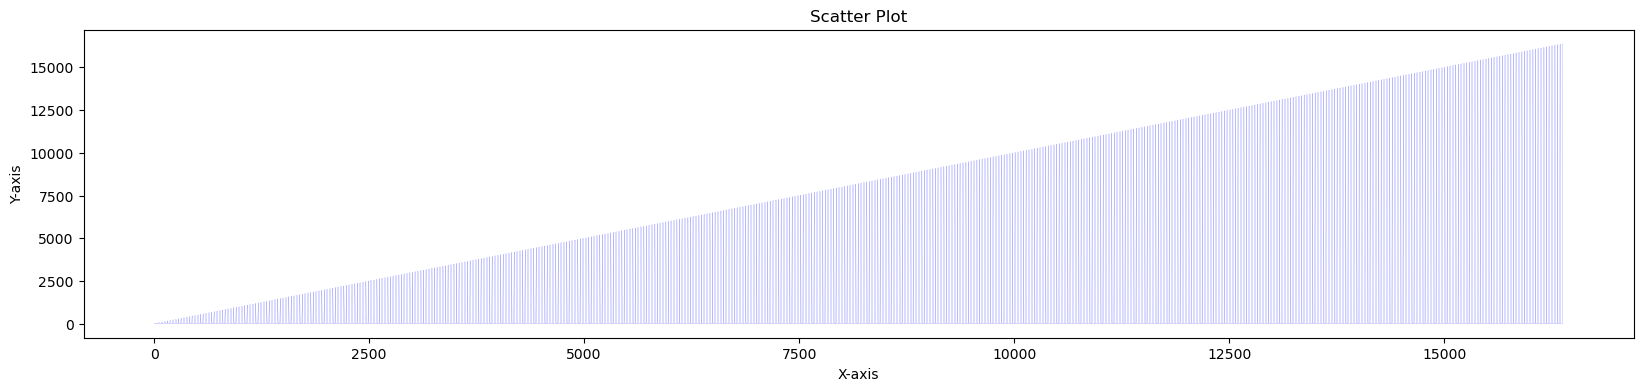

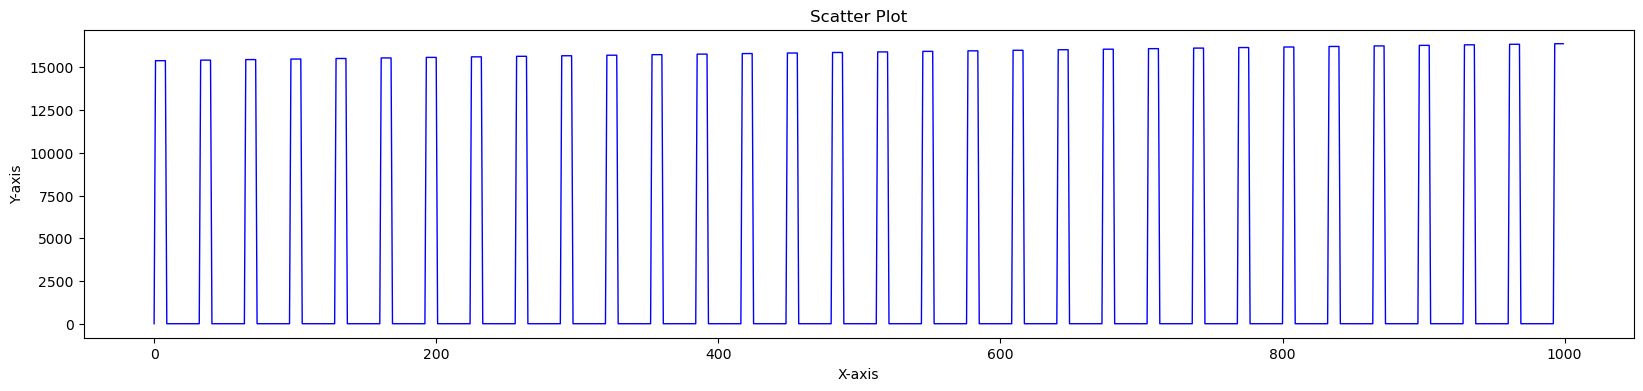

出去开头的0080，写入的数据为:
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 1f 00 1f 00 1f 00 1f 00 1f 00 1f 00 1f 00 1f 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 3f 00 3f 00 3f 00 3f 00 3f 00 3f 00 3f 00 3f 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 5f 00 5f 00 5f 00 5f 00 5f 00 5f 00 5f 00 5f 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 7f 00 7f 00 7f 00 7f 00 7f 00 7f 00 7f 00 7f 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 9f 00 9f 00 9f 00 9f 00 9f 00 9f 00 9f 00 9f 00 
00 00 00 00 

In [42]:
max=int('0x3fff',16)
lenth=int('0x3fff',16) #长度不是4000而是3fff，应该是考虑到周期为 T 的离散波形实际上只需要 T-1 个值，对于非周期波形状，只能强行舍掉一位
Nb=512
Ns=4
dx=lenth/(Nb*Ns)
dy=max/Nb

newvalue=[]
for i in range(lenth):
    ismall=int(i/dx)
    ibig=ismall//Ns
    ismall_in_big=ismall-Ns*ibig
    # ibig从0遍历到Nb-1，ismall从0遍历到Nb*Ns-1，ismall_in_big对于每一个固定的ibig从0遍历到Ns-1
    
    # print(i,ibig,int(i/(Ns*dx)),ismall,ismall_in_big) #如何表征二重分割
    # # print(ibig*dy)
    if ismall_in_big%Ns==(Ns-1):
        newvalue.append(int((ibig+1)*dy)) #考虑到ibig从0遍历到Nb-1，ismall从0遍历到Nb*Ns-1，ismall_in_big对于每一个固定的ibig从0遍历到Ns-1
    else:
        newvalue.append(0)



printlonglist(newvalue)
printlonglist(list_value_hex(newvalue))
# plot_scatter(newvalue)
plot_line(newvalue)
plot_line(newvalue[lenth-1000:lenth],linewidth=1)


writeraffile(newvalue,'512steps_zkb_25.raf')

0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
31    31    31    31    31    31    31    31    31    31    31    31    31    31    31    31    
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
63    63    63    63    63    63    63    63    63    63    63    63    63    63    63    63    
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
95    95    95    95    95    95    95    95    95    95    95    95    95    95    95    95    
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
127   127   127   127   127   127   127   127   127   127   127   127   127   127   127   127   
0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     
159   159   159   159   159   159   159   159   159   159   159   159   159   159   159   159   
0     0     0     0     0     

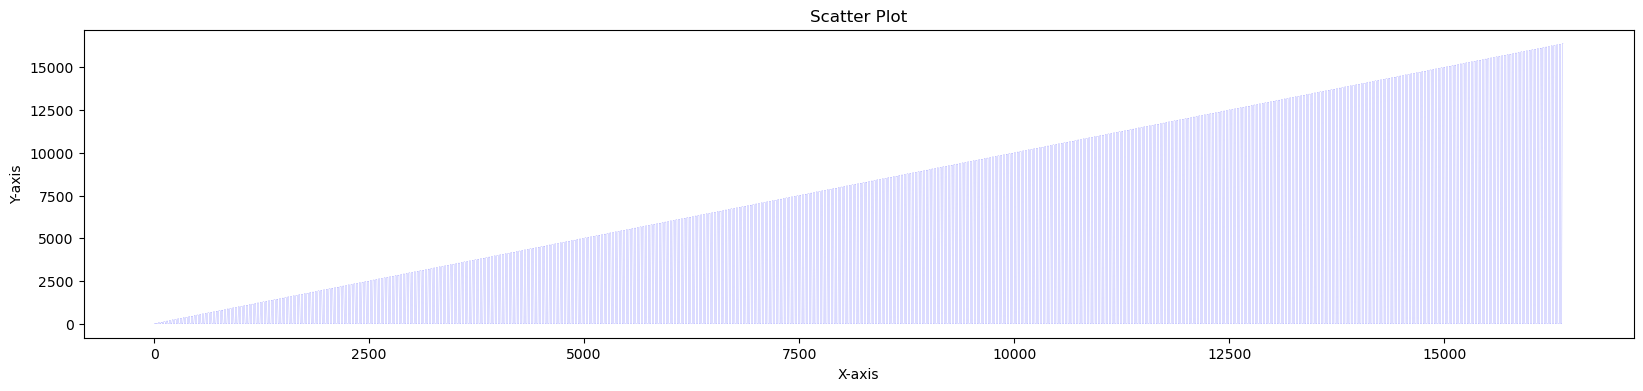

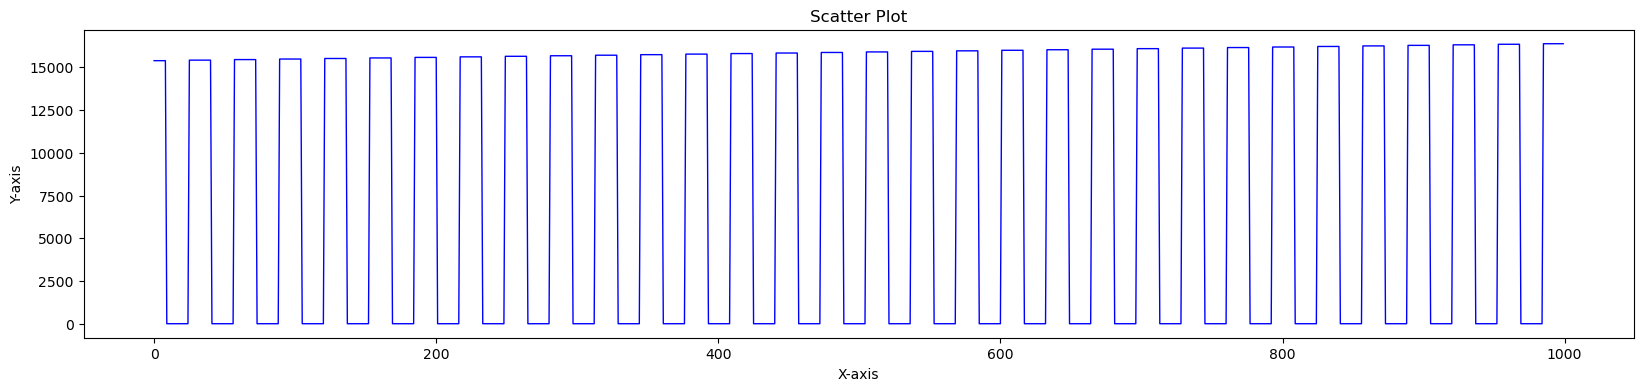

出去开头的0080，写入的数据为:
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
1f 00 1f 00 1f 00 1f 00 1f 00 1f 00 1f 00 1f 00 1f 00 1f 00 1f 00 1f 00 1f 00 1f 00 1f 00 1f 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
3f 00 3f 00 3f 00 3f 00 3f 00 3f 00 3f 00 3f 00 3f 00 3f 00 3f 00 3f 00 3f 00 3f 00 3f 00 3f 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
5f 00 5f 00 5f 00 5f 00 5f 00 5f 00 5f 00 5f 00 5f 00 5f 00 5f 00 5f 00 5f 00 5f 00 5f 00 5f 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
7f 00 7f 00 7f 00 7f 00 7f 00 7f 00 7f 00 7f 00 7f 00 7f 00 7f 00 7f 00 7f 00 7f 00 7f 00 7f 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
9f 00 9f 00 9f 00 9f 00 9f 00 9f 00 9f 00 9f 00 9f 00 9f 00 9f 00 9f 00 9f 00 9f 00 9f 00 9f 00 
00 00 00 00 

In [43]:
max=int('0x3fff',16)
lenth=int('0x3fff',16) #长度不是4000而是3fff，应该是考虑到周期为 T 的离散波形实际上只需要 T-1 个值，对于非周期波形状，只能强行舍掉一位
Nb=512
Ns=2
dx=lenth/(Nb*Ns)
dy=max/Nb #考虑到ibig从0遍历到Nb-1，ismall从0遍历到Nb*Ns-1，ismall_in_big对于每一个固定的ibig从0遍历到Ns-1

newvalue=[]
for i in range(lenth):
    ismall=int(i/dx)
    ibig=ismall//Ns
    ismall_in_big=ismall-Ns*ibig
    # print(i,ibig,int(i/(Ns*dx)),ismall,ismall_in_big) #如何表征二重分割
    # print(ibig*dy)
    if ismall_in_big%Ns==(Ns-1):
        newvalue.append(int((ibig+1)*dy))
    else:
        newvalue.append(0)

printlonglist(newvalue)
printlonglist(list_value_hex(newvalue))
plot_line(newvalue)
plot_line(newvalue[lenth-1000:lenth],linewidth=1)

writeraffile(newvalue,'512steps_zkb_50.raf')